<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/epacuit/introduction-machine-learning/blob/main/regression/introduction-regression.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(regression)=
# Regression Problems

**Regression** is a type of supervised machine learning task where the goal is to predict a continuous numeric outcome (e.g., prices, height, temperature) based on given input features.

**Examples of regression problems**:
  - Predicting median house prices from property details.
  - Estimating a person's salary from their years of education and experience.
  - Forecasting temperature or rainfall based on weather data.

## Common regression algorithms include:

- **Linear Regression**: Simple and interpretable, assumes a linear relationship between inputs and outputs.
- **Polynomial Regression**: Captures nonlinear relationships using polynomial features.
- **Neural Networks (Deep Learning)**: Capable of modeling complex relationships in data.
- **Decision Tree and Random Forest Regressors**: Good for nonlinear data, robust to outliers.

## Evaluating regression models:

Common metrics to evaluate regression performance include:

- **Mean Absolute Error (MAE)**: Average absolute prediction error.
- **Mean Squared Error (MSE)**: Average squared prediction error (penalizes large errors heavily).
- **Root Mean Squared Error (RMSE)**: Square root of MSE, easily interpretable in original units.
- **R-squared ($R^2$)**: Indicates the proportion of variance in the target explained by the model.

In summary, regression involves predicting numeric values from input data and is fundamental for tasks requiring continuous outcomes.


## Example of a Linear Regression Problem

Linear assumes that there is a linear relationship between the input features and the output variable.

In [1]:
import numpy as np

x = np.linspace(0, 10, 100)
print(x)

x_train = x.reshape(-1, 1)
print(x_train)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

2025-04-22 10:14:18.629390: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2025-04-22 10:14:18.629415: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2025-04-22 10:14:18.629418: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
I0000 00:00:1745331258.629430 5196556 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1745331258.629451 5196556 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-04-22 10:14:18.839767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


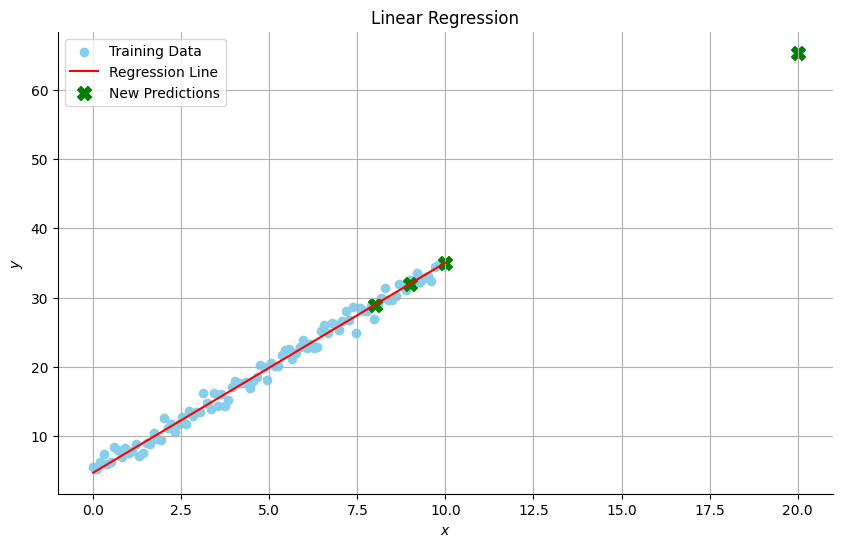

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
import seaborn as sns

# Generate synthetic linear data
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 3 * x + 5 + np.random.randn(100)

# IMPORTANT: Reshape inputs for Keras
x_train = x.reshape(-1, 1)  

# Define the linear model
model = keras.Sequential([
    Input(shape=(1,)),  # Input layer, each sample is a single value
    Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05), loss='mse', metrics=['mae'])

# Train longer to ensure convergence
history = model.fit(x_train, y, epochs=200, verbose=0)

# Predictions for the regression line
x_line = np.linspace(0, 10, 100)
y_line = model.predict(x_line.reshape(-1, 1))

# New predictions within training range
x_new = np.array([8, 9, 10, 20]).reshape(-1, 1)
y_new_pred = model.predict(x_new)

# Plotting clearly shows correct fitting
plt.figure(figsize=(10,6))
plt.scatter(x, y, label='Training Data', color='skyblue')
plt.plot(x_line, y_line, label='Regression Line', color='red')
plt.scatter(x_new, y_new_pred, label='New Predictions', color='green', s=100, marker='X')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
sns.despine()
plt.show()


It is more common to use the ``LinearRegression`` class from the ``sklearn`` library to perform linear regression.


Key Differences:

* No need to specify an input shape explicitly in `Scikit-learn` (but you still reshape data).

* `Scikit-learn` uses a straightforward API for linear regression (`LinearRegression()`).

* Typically simpler and faster for small or straightforward regression tasks.



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic linear data: y = 3x + 5 + noise
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 3 * x + 5 + np.random.randn(100)

# Reshape data for sklearn (critical step!)
x_train = x.reshape(-1, 1)

# Define and train linear regression model
model = LinearRegression()
model.fit(x_train, y, verbose=0)

# Generate predictions for regression line
y_line = model.predict(x_train)

# Make predictions on new data points
x_new = np.array([8, 9, 10, 11]).reshape(-1, 1)
y_new_pred = model.predict(x_new)

# Plot results clearly
plt.figure(figsize=(10,6))
plt.scatter(x, y, label='Training Data', color='skyblue')
plt.plot(x, y_line, label='Regression Line', color='red')
plt.scatter(x_new, y_new_pred, label='New Predictions', color='green', s=100, marker='X')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Scikit-learn')
plt.legend()
plt.grid(True)
sns.despine()
plt.show()


ModuleNotFoundError: No module named 'sklearn'

## Polynomial Regression

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/stepWARNING:tensorflow:5 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x2fa21e480> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


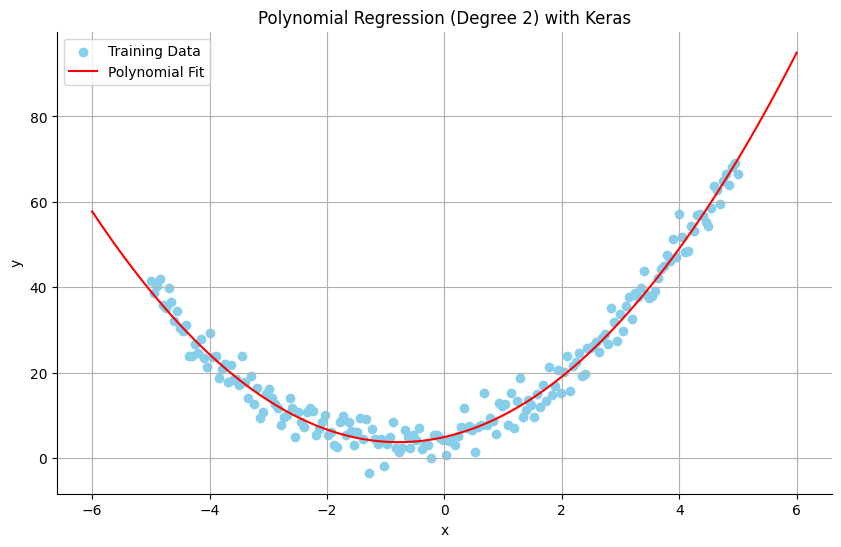

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

# Generate synthetic polynomial data (quadratic)
np.random.seed(42)
x = np.linspace(-5, 5, 200)
y = 2 * x**2 + 3 * x + 5 + np.random.randn(200) * 3

# Important: explicitly generate polynomial features (x, x^2)
x_poly = np.column_stack((x, x**2))

# Define polynomial regression model in Keras
model = Sequential([
    Input(shape=(2,)),  # Two input features: x and x^2
    Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05), loss='mse', metrics=['mae'])

# Train longer to ensure convergence
history = model.fit(x_poly, y, epochs=200, verbose=0)

# Predict values using the trained model
x_new = np.linspace(-6, 6, 200)
x_new_poly = np.column_stack((x_new, x_new**2))
y_pred = model.predict(x_new_poly)

# Plot results clearly
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Training Data', color='skyblue')
plt.plot(x_new, y_pred, label='Polynomial Fit', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 2) with Keras')
plt.legend()
plt.grid(True)
sns.despine()   
plt.show()


You can also use polynomial regression in `Scikit-learn` by transforming the input features into polynomial features using the `PolynomialFeatures` class.

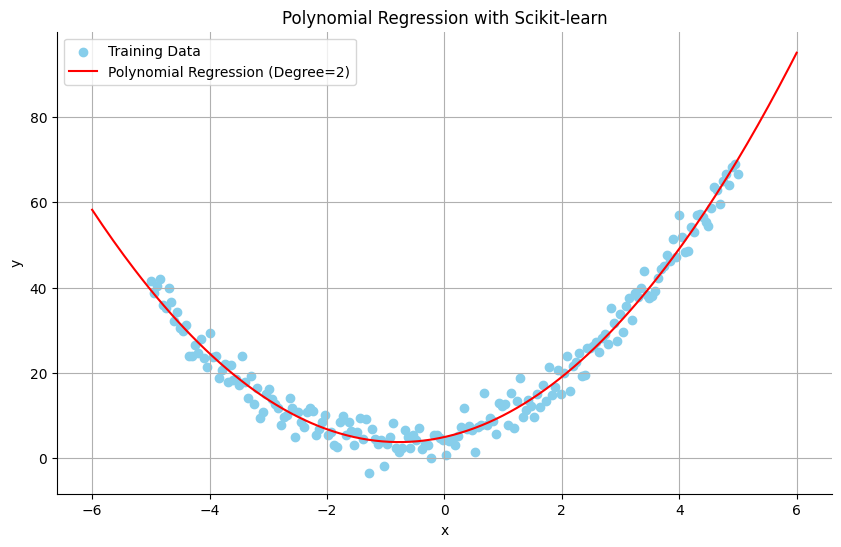

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic polynomial data (degree = 2)
np.random.seed(42)
x = np.linspace(-5, 5, 200)
y = 2 * x**2 + 3 * x + 5 + np.random.randn(200) * 3

# Reshape input data (important!)
x_train = x.reshape(-1, 1)

# Explicitly create polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train)

# Perform linear regression on the polynomial features
model = LinearRegression()
model.fit(x_poly, y)

# Predictions
x_new = np.linspace(-6, 6, 200).reshape(-1, 1)
x_new_poly = poly.transform(x_new)
y_pred = model.predict(x_new_poly)

# Plot clearly
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Training Data', color='skyblue')
plt.plot(x_new, y_pred, label='Polynomial Regression (Degree=2)', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with Scikit-learn')
plt.legend()
plt.grid(True)
sns.despine()
plt.show()
